In [5]:
"""Run circuit experiment"""
import os

import matplotlib.pyplot as plt
import numpy as np
from qibo.gates import M, X
from qibo.models.circuit import Circuit

from qililab import build_platform
from qililab.config import logger
from qililab.experiment import Experiment
from qililab.typings import ExperimentOptions, ExperimentSettings, Parameter
from qililab.typings.execution import ExecutionOptions
from qililab.typings.loop import LoopOptions
from qililab.utils import Loop
from qililab.utils.qibo_gates import Wait

logger.setLevel(30)

os.environ["RUNCARDS"] = "./runcards"
os.environ["DATA"] = "./data"

%matplotlib widget

In [29]:
"""Load the platform from the DB."""
platform = build_platform(name="galadriel_golum")
platform.connect_and_set_initial_setup()

print("\n Platform connected \n")

# Define Circuit to execute
circuit = Circuit(1)
circuit.add(X(0))
circuit.add(Wait(0, t=0))
circuit.add(M(0))

# To create a loop on a parametererized gate's parameter,
# we set parameter to `Paramter.GATE_PARAMETER` and alias to str(index).
# index represents the order that the gate was added to the circuit.
# It is the same order that `circuit.get_parameters()` returns.
wait_loop_options = LoopOptions(start=0, stop=3000, step=100)
wait_loop = Loop(alias="0", parameter=Parameter.GATE_PARAMETER, options=wait_loop_options)

experiment_options = ExperimentOptions(
    loops=[wait_loop],
    name="test-setup",
    execution_options=ExecutionOptions(set_initial_setup=False, apply_bus_setup=True),
    settings=ExperimentSettings(repetition_duration=200000, hardware_average=5000),
)

test_setup = Experiment(platform=platform, circuits=[circuit], options=experiment_options)

test_setup.set_parameter(alias="X", parameter=Parameter.DURATION, value=40)
test_setup.set_parameter(alias="M", parameter=Parameter.DURATION, value=2000)

# Instrument set parameter:

test_setup.set_parameter(alias="S4g", parameter=Parameter.CURRENT, value=-0.01, channel_id=1)
test_setup.set_parameter(alias="attenuator", parameter=Parameter.ATTENUATION, value=37)

# Bus setup set parameter

platform.set_parameter(alias="drive_line_q2_bus", parameter=Parameter.IF, value=100e6)
platform.set_parameter(alias="feedline_input_output_bus", parameter=Parameter.IF, value=20e6)
platform.set_parameter(alias="drive_line_q2_bus", parameter=Parameter.GAIN, value=0.3)
platform.set_parameter(alias="drive_line_q2_bus", parameter=Parameter.LO_FREQUENCY, value=6.652e9)
platform.set_parameter(alias="feedline_input_output_bus", parameter=Parameter.GAIN, value=0.5)
platform.set_parameter(alias="feedline_input_output_bus", parameter=Parameter.LO_FREQUENCY, value=8.1054e9)


results = test_setup.execute()

Connected to: Rohde&Schwarz SGS100A (serial:1416.0505k02/101901, firmware:4.2.76.0-4.30.046.295) in 0.15s
Connected to: Rohde&Schwarz SGS100A (serial:1416.0505k02/113049, firmware:4.2.76.0-4.30.046.295) in 0.06s
Connected to: Qblox SPI Rack (serial:None, firmware:{'device': 'v1.6 - May 10 2019 - mt', 'driver': {'version': '0.8.1', 'build': '13/12/2022-09:29:06', 'hash': '6c0c23ba', 'dirty': False}}) in 0.00s
Current too low for set span, DAC set to min value
Current too low for set span, DAC set to min value
set ref from cluster to internal
gain path0 set to 0.09997864067554474
gain path1 set to 0.09997864067554474
Initial setup was called
 
 Gain Imbalance set to 1.0 

 
 Phase Imbalance set to -0.0 

gain path0 set to 0.09997864067554474
gain path1 set to 0.09997864067554474
Initial setup was called
 
 Gain Imbalance set to 1.0309923887252808 

 
 Phase Imbalance set to 10.999509811401367 


 Platform connected 

SETUP SG: LO=6652000000.0
SETUP SG: power=13.0
SETUP SG: RF=True
SETUP 

  0%|          | 0/30 [00:00<?, ?it/s]

Current too low for set span, DAC set to min value
Current too low for set span, DAC set to min value


Text(0, 0.5, '|S21|')

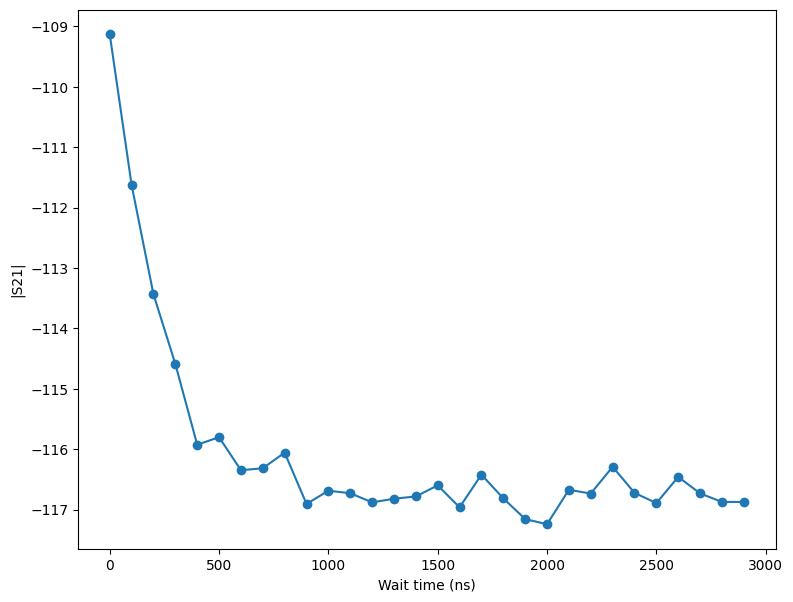

In [30]:
acquisitions = results.acquisitions()
i = np.array(acquisitions["i"])
q = np.array(acquisitions["q"])
wait = np.arange(start=0, stop=3000, step=100)

%matplotlib inline
plt.figure(figsize=(9, 7))
plt.plot(wait, 20 * np.log10(i**2 + q**2), "-o")
plt.xlabel("Wait time (ns)")
plt.ylabel("|S21|")

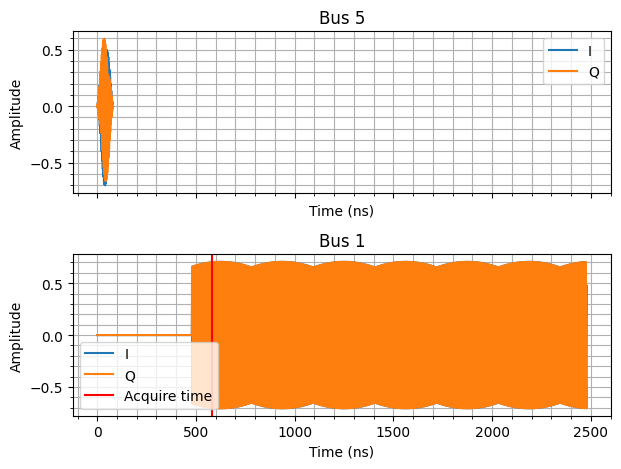

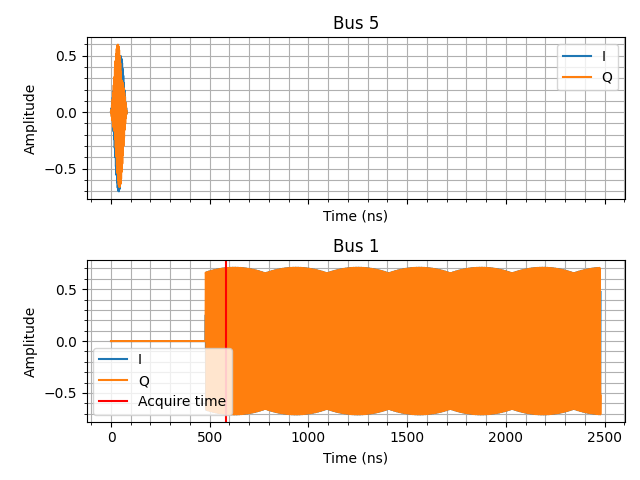

In [14]:
test_setup.draw()